# Crime Analysis and Safety Prediction Modeling

This is a New York City Crime Classification modeling aimed at predicting the safety level of AirBnB locations based on a given set of geographical and time-based features.<br>
In this project, I will explore the data, and explain in details the tools I used to achieve that result.

### Steps of the prediction modeling
1. Data Collection and Preprocessing
2. Clustering
3. Classification modeling
4. Evaluation and Prediction on the AirBnB data



In [103]:
"""
Created on Wed Mar 22 23:18:32 2018

@author: Sung Hyun Nam
"""

import numpy as np
import pandas as pd
import sys

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import io
import requests

In [104]:
# HTML display setting
from IPython.core.display import display, HTML
display(HTML(data="""
<style> div#notebook-container { width: 100%; } div#menubar-container { width: 85%; } div#maintoolbar-container { width: 99%; } </style>
"""))

# Dataframe display setting
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.encoding = sys.stdout.encoding

# Data Collection and Preprocessing

In [105]:
url_crime = "https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD"
url_airbnb = "http://data.insideairbnb.com/united-states/ny/new-york-city/2018-03-04/visualisations/listings.csv"

s1 = requests.get(url_crime).content
s2 = requests.get(url_airbnb).content

data_crime = pd.read_csv(io.StringIO(s1.decode('utf-8')))
data_airbnb = pd.read_csv(io.StringIO(s2.decode('utf-8')))

## 1. Crime Data

The [New York City Crime dataset](https://data.cityofnewyork.us/api/views/5uac-w243/rows.csv?accessType=DOWNLOAD) contains **24 attributes and 468,761 instances**.<br>
Below is the description of the features from the [footnote document](https://data.cityofnewyork.us/api/views/5uac-w243/files/fc4f191a-6adf-4268-a1ae-8525a8d7027b?download=true&filename=NYPDIncidentLevelDataFootnotes.pdf).

### Data Description

| Field Name | Description |
|:----------:|:-------------|
| CMPLNT_NUM | Randomly generated persistent ID for each complaint |
| CMPLNT_FR_DT | Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists) |
| CMPLNT_FR_TM | Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists) |
| CMPLNT_TO_DT | Ending date of occurrence for the reported event, if exact time of occurrence is unknown |
| CMPLNT_TO_TM | Ending time of occurrence for the reported event, if exact time of occurrence is unknown |
| RPT_DT | Date event was reported to police |
| KY_CD | Three digit offense classification code |
| OFNS_DESC | Description of offense corresponding with key code |
| PD_CD | Three digit internal classification code (more granular than Key Code) 
| PD_DESC | Description of internal classification corresponding with PD code (more granular than Offense Description) 
| CRM_ATPT_CPTD_CD | Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely 
| LAW_CAT_CD | Level of offense: felony, misdemeanor, violation |
| JURIS_DESC | Jurisdiction responsible for incident. Either internal, like Police, Transit, and Housing; or external, like Correction, Port Authority, etc. 
| BORO_NM | The name of the borough in which the incident occurred 
| ADDR_PCT_CD |The precinct in which the incident occurred 
| LOC_OF_OCCUR_DESC | Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of 
| PREM_TYP_DESC | Specific description of premises; grocery store, residence, street, etc. 
| PARKS_NM | Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included) 
| HADEVELOPT | Name of NYCHA housing development of occurrence, if applicable 
| X_COORD_CD | X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) 
| Y_COORD_CD | Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104) 
| Latitude | Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)  
| Longitude | Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [106]:
data_crime.head(6)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,579468609,12/31/2017,23:55:00,NaN,NaN,12/31/2017,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,67,NaN,STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,822699000,12/31/2017,23:30:00,NaN,NaN,12/31/2017,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,47,FRONT OF,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187081621,12/31/2017,23:10:00,12/31/2017,23:15:00,12/31/2017,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",COMPLETED,VIOLATION,N.Y. HOUSING POLICE,MANHATTAN,23,INSIDE,RESIDENCE - PUBLIC HOUSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,967006956,12/31/2017,23:05:00,12/31/2017,23:15:00,12/31/2017,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,73,INSIDE,RESIDENCE-HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,524297993,12/31/2017,23:00:00,NaN,NaN,12/31/2017,118,DANGEROUS WEAPONS,792.0,WEAPONS POSSESSION 1 & 2,COMPLETED,FELONY,N.Y. POLICE DEPT,BROOKLYN,61,FRONT OF,RESIDENCE - APT. HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,656720558,12/31/2017,23:00:00,NaN,NaN,12/31/2017,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BROOKLYN,61,INSIDE,STREET,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Missing Data Analysis

In order to handle the instances having a missing value, the missing value percentages for each column are sorted.<br>
**The data with missing coordinates was 2.1% of the total dataset**.

In [107]:
missing = data_crime.isnull().sum().sort_values(ascending=False)
ratio = (data_crime.isnull().sum() / data_crime.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, ratio.round(3)*100], axis=1, keys=["Count", "Percentage"])

# Only show the columns with missing values
missing_data = missing_data[missing_data.Count != 0]

In [108]:
# Missing data per column
missing_data

,Count,Percentage
PARKS_NM,464691,99.1
HADEVELOPT,444516,94.8
LOC_OF_OCCUR_DESC,90660,19.3
CMPLNT_TO_DT,73116,15.6
CMPLNT_TO_TM,72918,15.6
Longitude,10009,2.1
Lat_Lon,10009,2.1
X_COORD_CD,10009,2.1
Y_COORD_CD,10009,2.1
Latitude,10009,2.1


In [109]:
# Plot into a bar chart
fig=plt.figure(figsize=(12, 6))

objects = missing_data.index
y_pos = np.arange(len(objects))
performance = missing_data.Percentage
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation=50)
plt.ylabel('Percentile (%)', fontsize=12)
plt.xlabel('Features with missing data', fontsize=12)
plt.title('Missing Data Percentile', size=20)

plt.tight_layout()

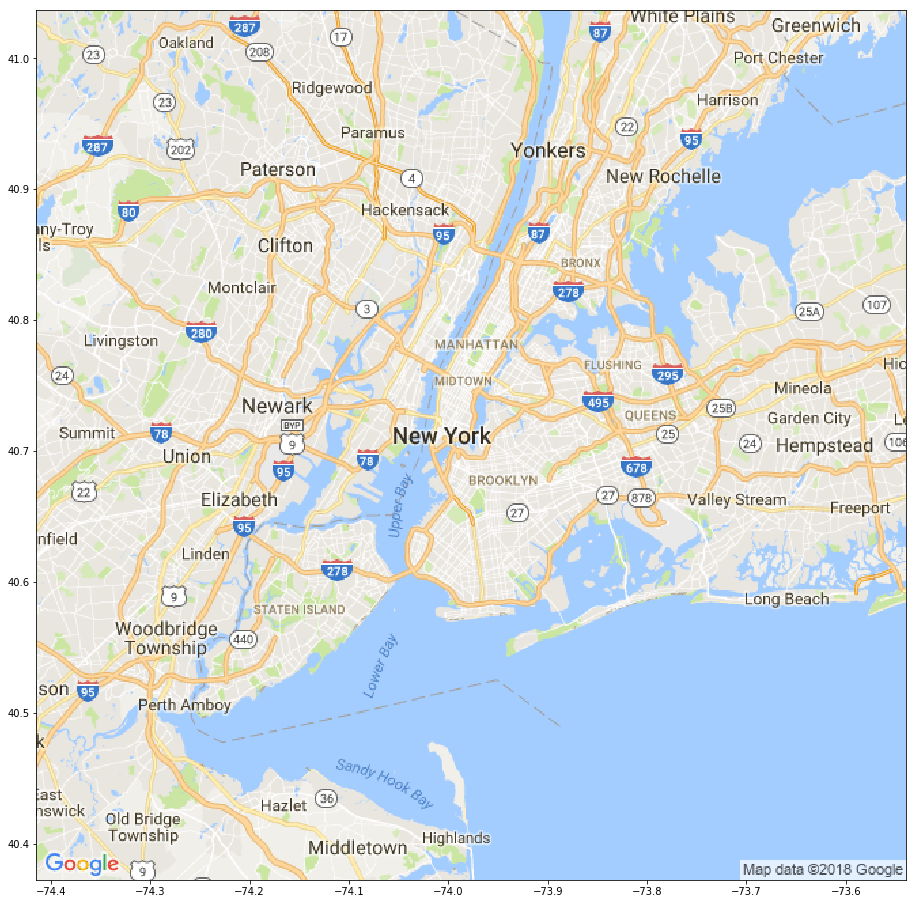

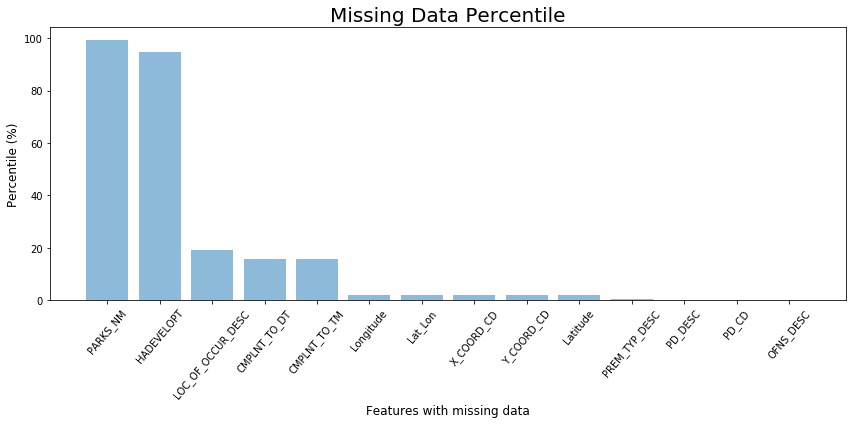

In [110]:
plt.show()

### Feature Selection

First, the relevant features were selected regarding the modeling and visualization phase.<br>
**The data with missing coordinates was 2.1% of the total dataset**.

In [111]:
# Select the columns to be used
df_select = data_crime[['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'KY_CD', "LAW_CAT_CD", "BORO_NM", "Latitude", "Longitude"]]

### Cleaning Data

The crime data is cleaned thus having **7 attributes and 458,752 instances**.<br>


| Field Name | Description |
|:----------:|:---------------------------------------------------|
| Date | Date of occurrence for the reported event |
| Time | Time of occurrence for the reported event |
| Class | Three digit offense classification code |
| Level | Level of offense: felony, misdemeanor, violation |
| Borough | The name of the borough in which the incident occurred |
| Latitude | Latitude coordinate
| Longitude | Longitude coordinate

In [13]:
# Rename the columns
df_select.columns = ['Date', 'Time', 'Class', 'Level', 'Borough', 'Latitude', 'Longitude']

# Erase the rows with missing coordinates
df_crime = df_select[pd.notnull(df_select['Longitude'])]

# Reset index
df_crime = df_crime.reset_index(drop=True)

In [14]:
df_crime.head(10)

,Date,Time,Class,Level,Borough,Latitude,Longitude
0,12/31/2017,12:30:00,344,MISDEMEANOR,BROOKLYN,40.651800,-74.012345
1,12/31/2017,01:00:00,109,FELONY,BRONX,40.821953,-73.928094
2,12/30/2017,15:10:00,105,FELONY,MANHATTAN,40.720892,-73.988818
3,12/30/2017,14:25:00,341,MISDEMEANOR,MANHATTAN,40.750431,-73.989282
4,12/30/2017,14:15:00,348,MISDEMEANOR,QUEENS,40.698443,-73.808546
5,12/30/2017,14:10:00,235,MISDEMEANOR,MANHATTAN,40.800880,-73.939979
6,12/30/2017,14:10:00,235,MISDEMEANOR,BROOKLYN,40.664239,-73.908425
7,12/30/2017,14:00:00,351,MISDEMEANOR,BROOKLYN,40.663598,-73.991091
8,12/30/2017,13:50:00,351,MISDEMEANOR,BROOKLYN,40.661045,-73.997432
9,12/30/2017,13:40:00,106,FELONY,STATEN ISLAND,40.624324,-74.151798


## 2. AirBnB Data
AirBnB Data contains **16 attributes and 48,852 instances**.

### Data Description

| Field Name | Description |
|:----------:|:-------------|
|id| listing id
|review_scores_location| 0-5 stars converted into a 0-10 scale
|name| listing name
|host_id| host id
|host_name| host name
|neighbourhood_group| NYC borough
|neighbourhood| NYC neighborhood
|latitude| listing latitude
|longitude| listing longitude
|room_type| type of listing (Entire home/apt, Private room, Shared room)
|price| listing price
|minimum_nights| required minimum nights stay
|number_of_reviews| total number of reviews
|last_review| date of last review
|reviews per month| average number of reviews per month
|calculated_host_listings_count| total number of listings for this host
|availability_365| number of days listing is available out of 365

In [15]:
data_airbnb.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2515,Stay at Chez Chic budget room #1,2758,Mizi,Manhattan,Harlem,40.799205,-73.953676,Private room,59,2,164,2018-02-11,1.43,3,316
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647486,-73.972370,Private room,39,1,7,2017-09-17,0.26,7,365
2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,1,29,2018-01-01,0.29,2,365
3,3330,++ Brooklyn Penthouse Guestroom ++,4177,Julia,Brooklyn,Williamsburg,40.708558,-73.942362,Private room,70,5,27,2017-12-12,0.27,3,279
4,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809018,-73.941902,Private room,150,3,0,NaN,NaN,1,365
5,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685138,-73.959757,Entire home/apt,89,1,181,2018-02-24,4.34,1,126


### Missing Data

In order to handle the instances having a missing value, the missing value percentages for each column are sorted.<br>
In this case, the missing data was not a critical matter.

In [16]:
missing = data_airbnb.isnull().sum().sort_values(ascending=False)
ratio = (data_airbnb.isnull().sum() / data_airbnb.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, ratio.round(3)*100], axis=1, keys=["Count", "Percentage"])

# Only show the columns with missing values
missing_data = missing_data[missing_data.Count != 0]

missing_data

,Count,Percentage
reviews_per_month,10936,22.4
last_review,10880,22.3
host_name,106,0.2
name,28,0.1


In [17]:
# Select the columns to be used
df_airbnb = data_airbnb.drop(['id', 'host_id', 'minimum_nights', 'last_review', 'reviews_per_month'], 1).reset_index(drop=True)

# Replace the values of missing name and host_name
df_airbnb.name = df_airbnb.name.fillna(df_airbnb['neighbourhood_group']+' '+df_airbnb['neighbourhood']+' '+df_airbnb['room_type'])
df_airbnb.host_name = df_airbnb.host_name.fillna('Host')

# Reset index
df_airbnb = df_airbnb.reset_index(drop=True)

df_airbnb.head(6)

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,calculated_host_listings_count,availability_365
0,Stay at Chez Chic budget room #1,Mizi,Manhattan,Harlem,40.799205,-73.953676,Private room,59,164,3,316
1,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.647486,-73.972370,Private room,39,7,7,365
2,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.753621,-73.983774,Entire home/apt,225,29,2,365
3,++ Brooklyn Penthouse Guestroom ++,Julia,Brooklyn,Williamsburg,40.708558,-73.942362,Private room,70,27,3,279
4,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.809018,-73.941902,Private room,150,0,1,365
5,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.685138,-73.959757,Entire home/apt,89,181,1,126


# Clustering

Clustering is done on unlabelled data returning a label for each datapoint. Classification requires labels.

Therefore you first cluster your data and save the resulting cluster labels. Then you train a classifier using these labels as a target variable. By saving the labels you effectively seperate the steps of clustering and classification. This enables you to use any classification algorithm (Random Forest, SVM, Naive Bayes, etc)

The problematic part of this pipeline is the lack of robustness of the k-means algorithm. Therefore we will have to evaluate the clustering result and possibly repetitivly perform k-means.

[Reference from Stackoverflow: How to do classification after clustering](https://stats.stackexchange.com/questions/264312/how-to-do-classification-after-clustering)


In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df_crime[['Longitude', 'Latitude']].values

kmns = KMeans(n_clusters=50, init='k-means++', precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
kY = kmns.fit_predict(X)

### Clusters using crime data<br>

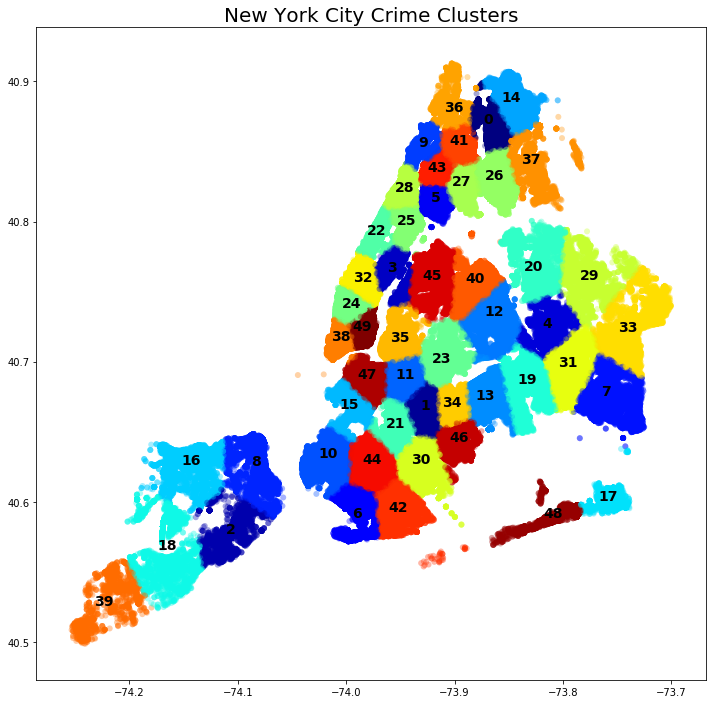

In [19]:
fig=plt.figure(figsize=(12, 12))

plt.scatter(X[:,0], X[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
for i in range(len(kmns.cluster_centers_)):
    plt.text(kmns.cluster_centers_[i,0],kmns.cluster_centers_[i,1], i, size=14, horizontalalignment='center', weight='bold')

plt.title('New York City Crime Clusters', size=20)

# 50 Clusters
plt.show()

### Clusters with google map<br>


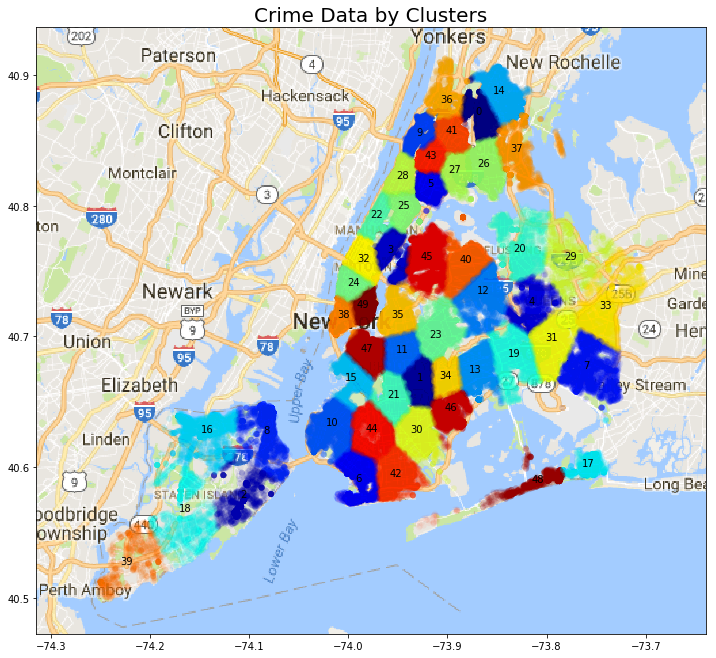

In [20]:
from PIL import Image
import requests
from io import BytesIO

fig=plt.figure(figsize=(12, 12))

url = "http://maps.googleapis.com/maps/api/staticmap?center=40.705745465,-73.97695376499999&size=800x800&zoom=10&sensor=false"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img, zorder=0, extent=[-74.414690, -73.539312, 40.372528, 41.036494], aspect=1.31841)

plt.scatter(X[:,0], X[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.05)
for i in range(len(kmns.cluster_centers_)):
    plt.text(kmns.cluster_centers_[i,0],kmns.cluster_centers_[i,1], i, size=10, horizontalalignment='center')

plt.title('Crime Data by Clusters', size=20)

(xmin, xmax), (ymin, ymax) = plt.xlim(), plt.ylim()

axes = plt.gca()
axes.set_xlim([xmin+0.1,xmax-0.1])
axes.set_ylim([ymin+0.1,ymax-0.1])

plt.show()

## Clustering Analysis

1. Number of crime per cluster
2. Level of crime per cluster

### 1. Number of crime per cluster

Calculated the incidents by cluster and sorted the values.

In [67]:
df_crime_cluster = pd.DataFrame(np.array(np.hstack((df_crime, np.array([kY]).T))), columns=list(df_crime.columns) + ['Cluster'])
df_crime_cluster.head(6)

,Date,Time,Class,Level,Borough,Latitude,Longitude,Cluster
0,12/31/2017,12:30:00,344,MISDEMEANOR,BROOKLYN,40.6518,-74.0123,10
1,12/31/2017,01:00:00,109,FELONY,BRONX,40.822,-73.9281,5
2,12/30/2017,15:10:00,105,FELONY,MANHATTAN,40.7209,-73.9888,49
3,12/30/2017,14:25:00,341,MISDEMEANOR,MANHATTAN,40.7504,-73.9893,32
4,12/30/2017,14:15:00,348,MISDEMEANOR,QUEENS,40.6984,-73.8085,31
5,12/30/2017,14:10:00,235,MISDEMEANOR,MANHATTAN,40.8009,-73.94,25


In [68]:
df_crime_number = df_crime_cluster[['Cluster', 'Longitude']].groupby(['Cluster']).agg('count')
df_crime_number.columns=['Crime']

# number of crime per cluster
df_crime_number.head(6)

,Crime
Cluster,
0,8952
1,12768
2,2780
3,8976
4,4047
5,13347


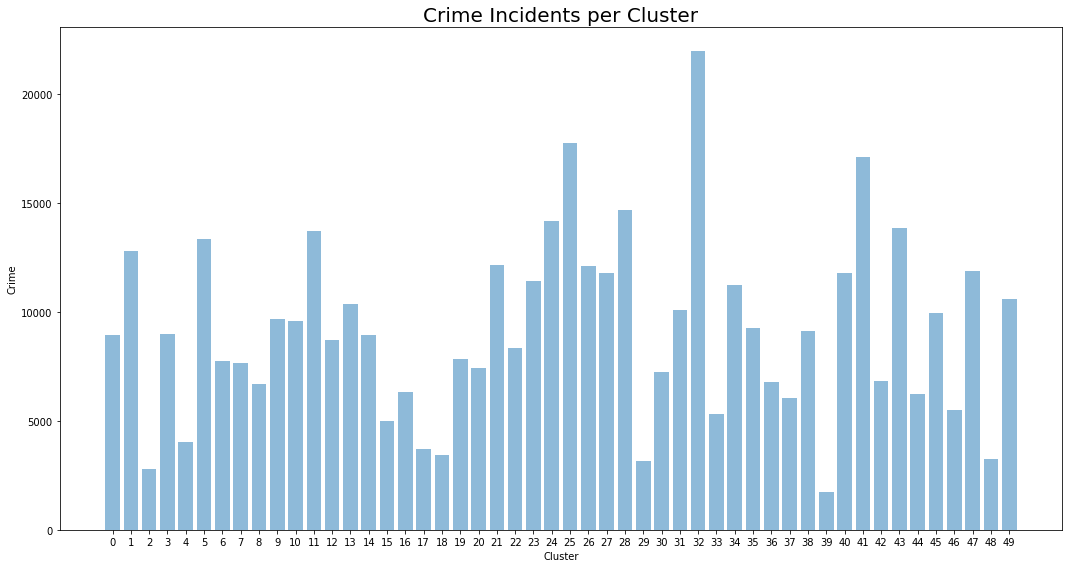

In [69]:
fig=plt.figure(figsize=(15, 8))

objects = df_crime_number.index
y_pos = np.arange(len(objects))
performance = df_crime_number['Crime']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Crime')
plt.xlabel('Cluster')
plt.title('Crime Incidents per Cluster', size=20)

plt.tight_layout()
plt.show()

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(500,2000))
df_crime_number_p = pd.DataFrame(scaler.fit_transform(df_crime_number), columns=['Crime'])
df_crime_number_p

,Crime
0,1036.090374
1,1319.078459
2,578.385327
3,1037.870174
4,672.343897
5,1362.016117
6,947.841993
7,941.093588
8,868.047659
9,1088.742770


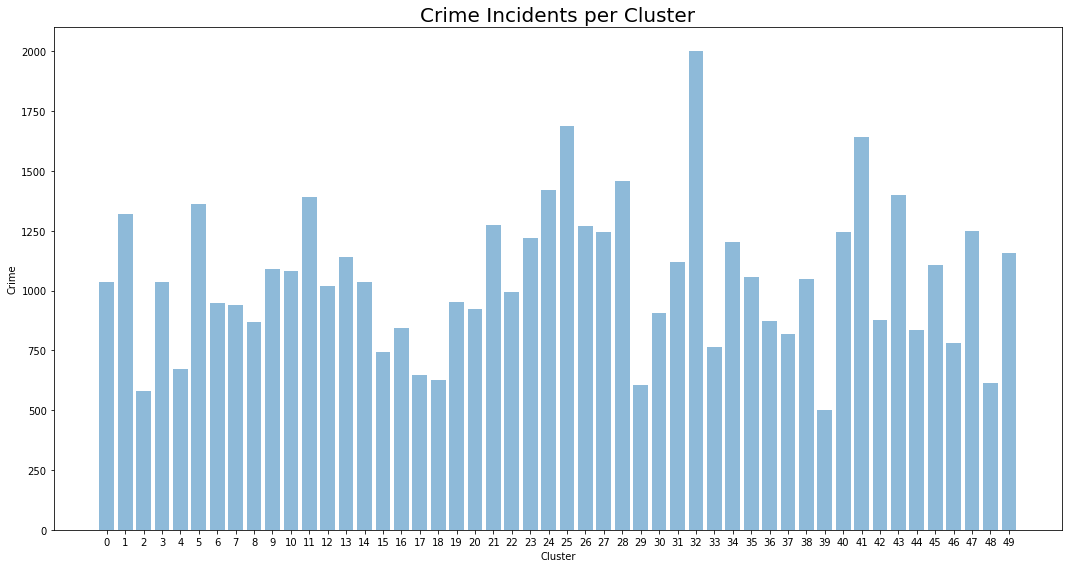

In [71]:
fig=plt.figure(figsize=(15, 8))

objects = df_crime_number_p.index
y_pos = np.arange(len(objects))
performance = df_crime_number_p['Crime']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Crime')
plt.xlabel('Cluster')
plt.title('Crime Incidents per Cluster', size=20)

plt.tight_layout()
plt.show()

### 2. Level of crime per cluster

Calculated the class of the crime by cluster and sorted the values.<br>
Each cluster has below portions.

In [72]:
df_crime_level = df_crime_cluster.groupby(["Cluster", "Level"]).agg({'Longitude':'count'}).rename(columns={'Longitude':'Count'})
df_crime_level

Count
Cluster Level             
0       FELONY        2480
        MISDEMEANOR   5153
        VIOLATION     1319
1       FELONY        4084
        MISDEMEANOR   6500
        VIOLATION     2184
2       FELONY         593
        MISDEMEANOR   1451
        VIOLATION      736
3       FELONY        3174
        MISDEMEANOR   4684
        VIOLATION     1118
4       FELONY        1301
        MISDEMEANOR   2082
        VIOLATION      664
5       FELONY        3759
        MISDEMEANOR   7667
        VIOLATION     1921
6       FELONY        2227
        MISDEMEANOR   4475
        VIOLATION     1060
7       FELONY        2606
        MISDEMEANOR   3948
        VIOLATION     1117
8       FELONY        1500
        MISDEMEANOR   3682
        VIOLATION     1504
9       FELONY        3011
        MISDEMEANOR   5399
        VIOLATION     1252
...                    ...
40      FELONY        4058
        MISDEMEANOR   6131
        VIOLATION     1594
41      FELONY        4954
        MISDEMEANOR   9741
        VIOLATION     2429
42      FELONY        2097
        MISDEMEANOR   3865
        VIOLATION      847
43      FELONY        3592
        MISDEMEANOR   8109
        VIOLATION     2135
44      FELONY        1981
        MISDEMEANOR   3332
        VIOLATION      927
45      FELONY        2840
        MISDEMEANOR   5384
        VIOLATION     1702
46      FELONY        1897
        MISDEMEANOR   2685
        VIOLATION      909
47      FELONY        3494
        MISDEMEANOR   6674
        VIOLATION     1682
48      FELONY        1163
        MISDEMEANOR   1600
        VIOLATION      479
49      FELONY        3238
        MISDEMEANOR   6105
        VIOLATION     1231

[150 rows x 1 columns]

Levels are changed into a numeric values in order to calculate the mean statistics.<br>

In [73]:
df_crime_cluster['Level'] = df_crime_cluster['Level'].replace({'FELONY': 4, 'MISDEMEANOR': 2, 'VIOLATION': 1})

In [74]:
df_crime_level = df_crime_cluster.groupby(["Cluster", "Level"]).agg({'Longitude':'count'}).rename(columns={'Longitude':'Count'})
df_crime_level

Count
Cluster Level       
0       1       1319
        2       5153
        4       2480
1       1       2184
        2       6500
        4       4084
2       1        736
        2       1451
        4        593
3       1       1118
        2       4684
        4       3174
4       1        664
        2       2082
        4       1301
5       1       1921
        2       7667
        4       3759
6       1       1060
        2       4475
        4       2227
7       1       1117
        2       3948
        4       2606
8       1       1504
        2       3682
        4       1500
9       1       1252
        2       5399
        4       3011
...              ...
40      1       1594
        2       6131
        4       4058
41      1       2429
        2       9741
        4       4954
42      1        847
        2       3865
        4       2097
43      1       2135
        2       8109
        4       3592
44      1        927
        2       3332
        4       1981
45      1       1702
        2       5384
        4       2840
46      1        909
        2       2685
        4       1897
47      1       1682
        2       6674
        4       3494
48      1        479
        2       1600
        4       1163
49      1       1231
        2       6105
        4       3238

[150 rows x 1 columns]

In [75]:
df_crime_level = df_crime_cluster.groupby(["Cluster"]).agg({'Level':'mean'}).rename(columns={'Level':'Mean Level'})
df_crime_level

,Mean Level
Cluster,
0,2.406725
1,2.468672
2,2.161871
3,2.582665
4,2.478873
5,2.419345
6,2.437258
7,2.533829
8,2.223751


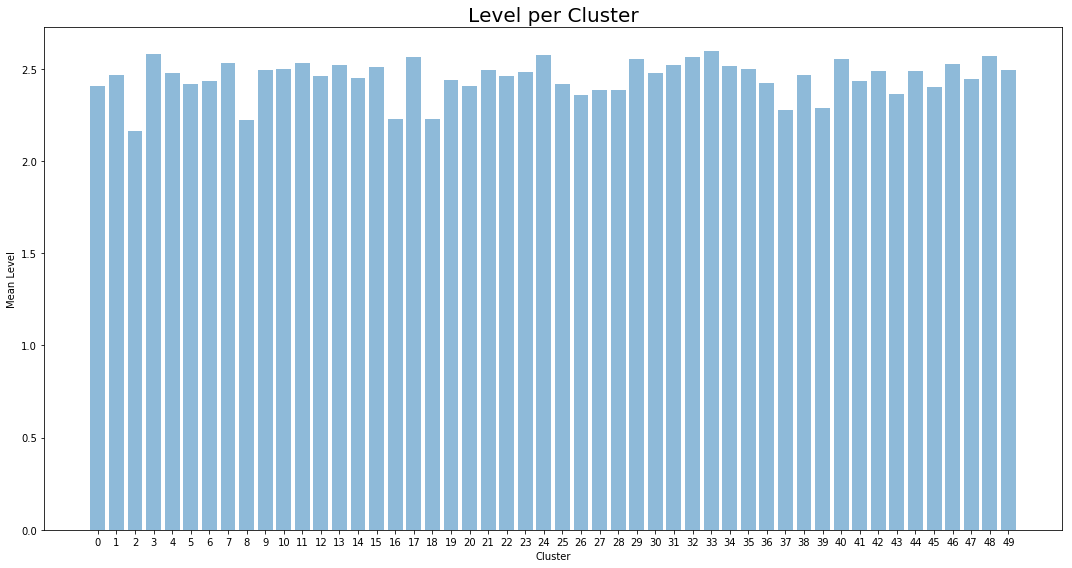

In [76]:
fig=plt.figure(figsize=(15, 8))

objects = df_crime_level.index
y_pos = np.arange(len(objects))
performance = df_crime_level['Mean Level']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Level')
plt.xlabel('Cluster')
plt.title('Level per Cluster', size=20)

plt.tight_layout()
plt.show()

Standard scaling due to similar distribution

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.5,2))
df_crime_level_p = pd.DataFrame(scaler.fit_transform(df_crime_level), columns=['Level'])
df_crime_level_p

,Level
0,1.346547
1,1.560720
2,0.500000
3,1.954834
4,1.595990
5,1.390180
6,1.452113
7,1.785990
8,0.713943
9,1.647205


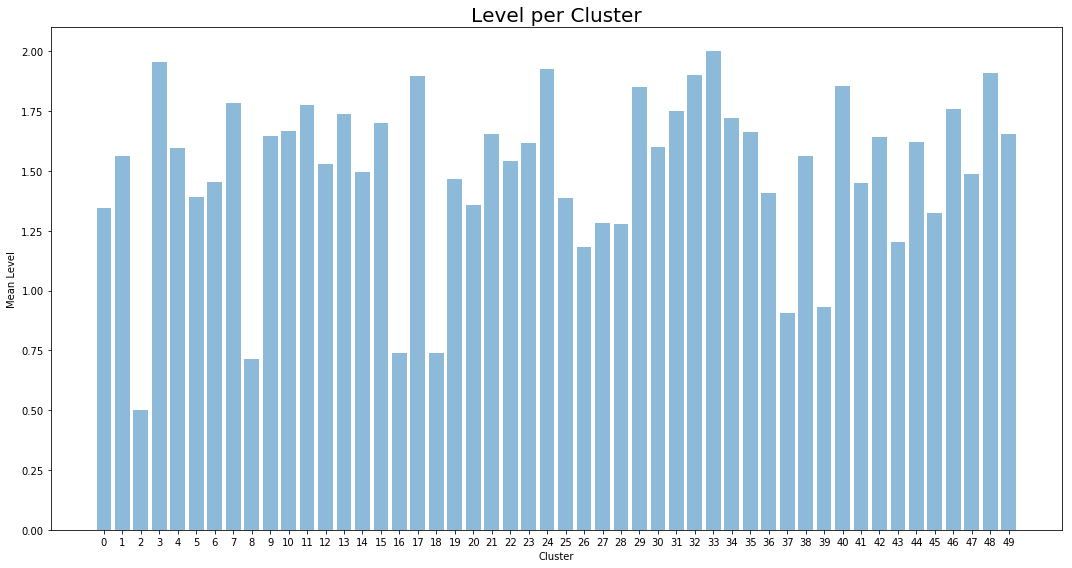

In [78]:
fig=plt.figure(figsize=(15, 8))

objects = df_crime_level_p.index
y_pos = np.arange(len(objects))
performance = df_crime_level_p['Level']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Level')
plt.xlabel('Cluster')
plt.title('Level per Cluster', size=20)

plt.tight_layout()
plt.show()

In [79]:
df_X = pd.DataFrame(kmns.cluster_centers_).rename(columns={0:'Longitude', 1:'Latitude'})
df_X

,Longitude,Latitude
0,-73.869049,40.870259
1,-73.927174,40.666313
2,-74.106244,40.577437
3,-73.958057,40.764407
4,-73.814915,40.724529
5,-73.917326,40.814628
6,-73.989916,40.589183
7,-73.760064,40.676118
8,-74.082836,40.625764
9,-73.928564,40.853763


In [80]:
df_y = pd.DataFrame(np.array(np.hstack((df_crime_number_p, np.array([df_crime_level_p['Level']]).T))), columns=list(df_crime_number.columns) + ['Level'])
df_y['Target'] = df_y['Crime'] * df_y['Level']
df_y['Target'] = df_y['Target']
df_y.head(10)

,Crime,Level,Target
0,1036.090374,1.346547,1395.144647
1,1319.078459,1.560720,2058.711549
2,578.385327,0.500000,289.192663
3,1037.870174,1.954834,2028.864064
4,672.343897,1.595990,1073.054095
5,1362.016117,1.390180,1893.448209
6,947.841993,1.452113,1376.373621
7,941.093588,1.785990,1680.784030
8,868.047659,0.713943,619.736601
9,1088.742770,1.647205,1793.382491


## Plot the target (safety) result

In [81]:
### Let's plot
dat = df_y['Target']

# min, max, and border
c_min, c_max = dat.values.min(), dat.values.max()+1
crime_range = np.linspace(c_min, c_max, 6)

cluster_dict = dict(zip(dat.index.values, dat.values))

# dictionary of clusters and corresponding number of crime
sorted_x = dict(sorted(cluster_dict.items(), key=lambda x: x[1]))

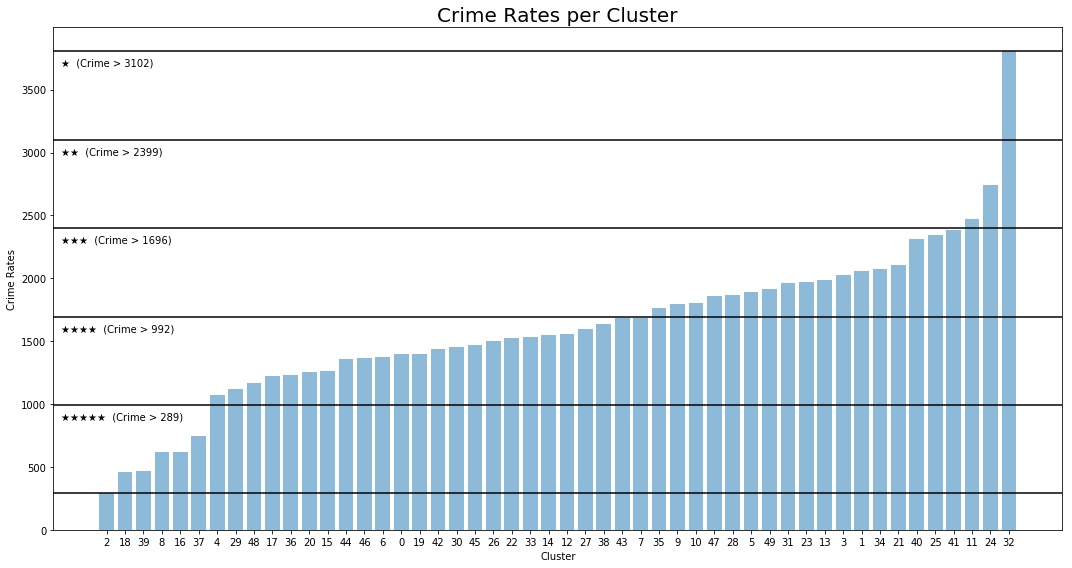

In [82]:
fig=plt.figure(figsize=(15, 8))

objects = sorted_x.keys()
y_pos = np.arange(len(objects))
performance = sorted_x.values()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Crime Rates')
plt.xlabel('Cluster')
plt.title('Crime Rates per Cluster', size=20)

for i, border in enumerate(crime_range):
    plt.axhline(y=border, c='black', hold=None)
    if i<5:
        plt.text(-2.5, border+(c_max-c_min)/6, "★"*(5-i)+'  (Crime > %.0f)' % border, size=10)
    
plt.tight_layout()
plt.show()

In [83]:
df_y['Safety'] = 6 - ((df_y['Target'] - c_min) // ((c_max-c_min)/5) + 1)
df_y

,Crime,Level,Target,Safety
0,1036.090374,1.346547,1395.144647,4.0
1,1319.078459,1.560720,2058.711549,3.0
2,578.385327,0.500000,289.192663,5.0
3,1037.870174,1.954834,2028.864064,3.0
4,672.343897,1.595990,1073.054095,4.0
5,1362.016117,1.390180,1893.448209,3.0
6,947.841993,1.452113,1376.373621,4.0
7,941.093588,1.785990,1680.784030,4.0
8,868.047659,0.713943,619.736601,5.0
9,1088.742770,1.647205,1793.382491,3.0


In [84]:
safeY = []
for x in kY:
    safeY.append(df_y['Safety'][x])

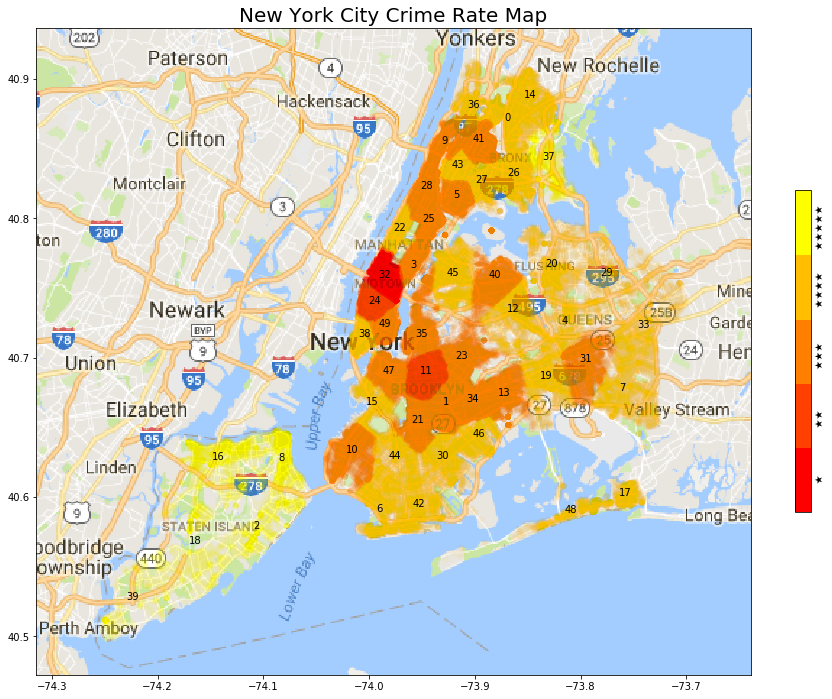

In [85]:
from PIL import Image
import requests
from io import BytesIO

fig=plt.figure(figsize=(16, 16))

url = "http://maps.googleapis.com/maps/api/staticmap?center=40.705745465,-73.97695376499999&size=800x800&zoom=10&sensor=false"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img, zorder=0, extent=[-74.414690, -73.539312, 40.372528, 41.036494], aspect=1.31841)

plt.scatter(X[:,0], X[:,1],  c=safeY, cmap = plt.cm.get_cmap('autumn',5), edgecolor = "None", alpha=0.02)
for i in range(len(kmns.cluster_centers_)):
    plt.text(kmns.cluster_centers_[i,0],kmns.cluster_centers_[i,1], i, size=10, horizontalalignment='center')

color_bar = plt.colorbar(ticks=[], label='     ★               ★★             ★★★           ★★★★       ★★★★★', shrink=0.37)
color_bar.set_alpha(50)
color_bar.draw_all()
plt.title('New York City Crime Rate Map', size=20)

(xmin, xmax), (ymin, ymax) = plt.xlim(), plt.ylim()

axes = plt.gca()
axes.set_xlim([xmin+0.1,xmax-0.1])
axes.set_ylim([ymin+0.1,ymax-0.1])

plt.show()

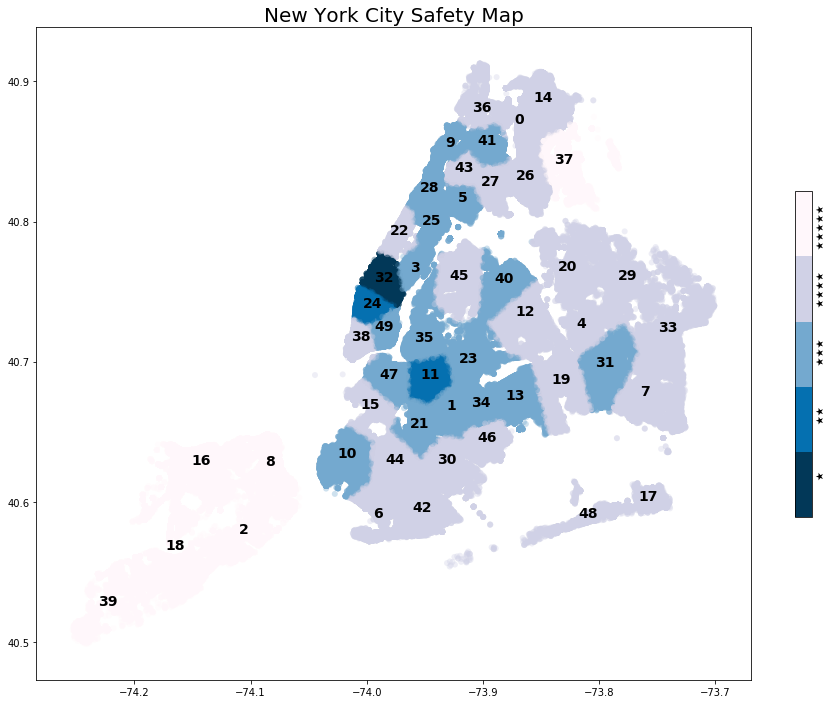

In [86]:
fig=plt.figure(figsize=(16, 12))
plt.scatter(X[:,0], X[:,1],  c=safeY, cmap = plt.cm.get_cmap('PuBu_r',5), edgecolor = "None", alpha=0.35)
for i in range(len(kmns.cluster_centers_)):
    plt.text(kmns.cluster_centers_[i,0],kmns.cluster_centers_[i,1], i, size=14, horizontalalignment='center', weight='bold')

color_bar = plt.colorbar(ticks=[], label='        ★               ★★             ★★★          ★★★★       ★★★★★', shrink=0.5)
color_bar.set_alpha(3)
color_bar.draw_all()
plt.title('New York City Safety Map', size=20)
plt.show()

# Modeling - Classification

1. K-nearest neighbour
2. Density Estimation

Let's first take a look at the dataset we are going to fit.

In [87]:
# X
df_X.head(6)

,Longitude,Latitude
0,-73.869049,40.870259
1,-73.927174,40.666313
2,-74.106244,40.577437
3,-73.958057,40.764407
4,-73.814915,40.724529
5,-73.917326,40.814628


In [88]:
# y
df_y['Target'].head(6)

0    1395.144647
1    2058.711549
2     289.192663
3    2028.864064
4    1073.054095
5    1893.448209
Name: Target, dtype: float64

In [89]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.metrics import accuracy_score

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y['Safety'], test_size=0.1, random_state=0)

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(5, 30)), 'weights': ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

rand_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
rand_knn.fit(X_train, y_train)

y_pred = rand_knn.predict(X_train).round()
train_score = accuracy_score(y_train, y_pred)
print('train score: {:.1f}%'.format(train_score*100))

y_pred = rand_knn.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print('test accuracy: {:.1f}%'.format(test_score*100))

print('cross-validated test score: {:.1f}%'.format(rand_knn.best_score_*100))

train score: 100.0%
test accuracy: 40.0%
cross-validated test score: 64.4%


In [91]:
# SVM
from sklearn.svm import SVC

svm = SVC()
param_grid = {'C': [10**x for x in range(3)], 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma' : [0.001, 0.01, 0.1, 1]}

rand_svm = GridSearchCV(svm, param_grid, cv=10, scoring='accuracy')
rand_svm.fit(X_train, y_train)

y_pred = rand_svm.predict(X_train).round()
train_score = accuracy_score(y_train, y_pred)
print('train score: {:.1f}%'.format(train_score*100))

y_pred = rand_svm.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print('test accuracy: {:.1f}%'.format(test_score*100))

print('cross-validated test score: {:.1f}%'.format(rand_svm.best_score_*100))

train score: 60.0%
test accuracy: 20.0%
cross-validated test score: 60.0%


In [92]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_grid = {"n_estimators": list(range(10,15)), "max_depth": [None, 2, 5]}

rand_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy')
rand_rfc.fit(X_train, y_train)

y_pred = rand_rfc.predict(X_train).round()
train_score = accuracy_score(y_train, y_pred)
print('train score: {:.1f}%'.format(train_score*100))

y_pred = rand_rfc.predict(X_test)
test_score = accuracy_score(y_test, y_pred)
print('test accuracy: {:.1f}%'.format(test_score*100))

print('cross-validated test score: {:.1f}%'.format(rand_rfc.best_score_*100))

train score: 97.8%
test accuracy: 40.0%
cross-validated test score: 62.2%


# Plotting the decision boundaries

In [93]:
fig=plt.figure(figsize=(16, 16))

url = "http://maps.googleapis.com/maps/api/staticmap?center=40.705745465,-73.97695376499999&size=800x800&zoom=10&sensor=false"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

ext = [-74.414690, -73.539312, 40.372528, 41.036494]

In [94]:
# background image
plt.imshow(img, zorder=0, extent=ext, aspect=(ext[1]-ext[0])/(ext[3]-ext[2]))

# step size in the mesh
h = .001

# create the mesh
x_min, x_max, y_min, y_max = ext
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
Z = rand_knn.predict(np.c_[xx.ravel(), yy.ravel()])
np.unique(Z)

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
#ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(xx, yy, c=Z, cmap = plt.cm.get_cmap('autumn',5), alpha=0.1)

# Draw colorbar    
#color_bar = plt.colorbar(ticks=[], label='     ★               ★★             ★★★           ★★★★       ★★★★★', shrink=0.37)
#color_bar.set_alpha(50)
#color_bar.draw_all()
#plt.title('New York City Safety Map', size=20)

# readjust the scale of the map
(xmin, xmax), (ymin, ymax) = plt.xlim(), plt.ylim()

axes = plt.gca()
axes.set_xlim([xmin+0.1,xmax-0.1])
axes.set_ylim([ymin+0.1,ymax-0.1])

plt.show()

In [183]:
'''
Airbnb Safety Calculation
'''

'\nAirbnb Safety Calculation\n'

In [101]:
kY_airbnb = rand_knn.predict(df_airbnb[['longitude', 'latitude']])

column = list(df_airbnb.columns)
column.append('Safety')

df_airbnb_safety = pd.DataFrame(np.concatenate((df_airbnb, np.array([kY_airbnb]).T), axis=1), columns=column)
df_airbnb_safety

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,calculated_host_listings_count,availability_365,Safety
0,Stay at Chez Chic budget room #1,Mizi,Manhattan,Harlem,40.7992,-73.9537,Private room,59,164,3,316,3
1,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.6475,-73.9724,Private room,39,7,7,365,4
2,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.7536,-73.9838,Entire home/apt,225,29,2,365,1
3,++ Brooklyn Penthouse Guestroom ++,Julia,Brooklyn,Williamsburg,40.7086,-73.9424,Private room,70,27,3,279,3
4,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.809,-73.9419,Private room,150,0,1,365,3
5,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.6851,-73.9598,Entire home/apt,89,181,1,126,3
6,Available! Perfect location! Entire apartment!,New-Yorker,Manhattan,Hell's Kitchen,40.7626,-73.993,Entire home/apt,150,26,1,17,3
7,Midtown West,Tom,Manhattan,Hell's Kitchen,40.7655,-73.9863,Entire home/apt,150,58,1,2,3
8,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,40.6869,-73.956,Private room,60,51,2,365,3
9,Spacious Brooklyn Duplex + Garden,Rebecca,Brooklyn,Sunset Park,40.6612,-73.9942,Entire home/apt,253,1,1,358,4


In [102]:
df_airbnb_safety.to_csv("airbnb_safety_final.csv", encoding='utf-8')

# Crime heatmaps

Felony, misdemeanor, violation

In [52]:
df_crime_safety.groupby(["Borough","Level"]).agg({'Safety':'count'}).rename(columns={'Safety':'Count'})

KeyError: 'Borough'

## By crime levels

In [11]:
df_felony = df_crime[df_crime['Level']=='FELONY'][['Latitude', 'Longitude']]
df_misdem = df_crime[df_crime['Level']=='MISDEMEANOR'][['Latitude', 'Longitude']]
df_violat = df_crime[df_crime['Level']=='VIOLATION'][['Latitude', 'Longitude']]

In [15]:
from gmplot import gmplot

# Place map
gmap = gmplot.GoogleMapPlotter(40.75, -73.97, 11)

levels = ['Felony', 'Misdemeanor', 'Violation']
df_levels = [df_felony, df_misdem, df_violat]

for name, lvl in zip(levels, df_levels):
    lats, lons = lvl[['Latitude']].values, lvl[['Longitude']].values
    
    # Heatmap
    gmap.heatmap(lats, lons)

    # Draw
    gmap.draw(name+"2.html", map_styles=map_styles)
    
    map_styles = [
    {
        'featureType': 'all',
        'stylers': [
            {'saturation': -80 },
            {'lightness': 60 },
        ]
    }
    ]
    
    # Marker function
    #for lat,lon in zip(lats,lons):
    #    gmap.marker(lat, lon, 'cornflowerblue')


## Single map weighted by crime level

In [14]:
from gmplot import gmplot

# Place map
gmap = gmplot.GoogleMapPlotter(40.75, -73.97, 11)

levels = ['Felony', 'Misdemeanor', 'Violation']
df_levels = [df_felony, df_misdem, df_violat]
weights = [[3]*len(df_felony), [2]*len(df_misdem), [1]*len(df_violat)]

for name, lvl, weight in zip(levels, df_levels, weights):
    lats, lons = lvl[['Latitude']].values, lvl[['Longitude']].values
    

    gmap.heatmap_weighted(lats, lons, weight)

map_styles = [
    {
        'featureType': 'all',
        'stylers': [
            {'saturation': -80 },
            {'lightness': 60 },
        ]
    }
]

gmap.draw("crime_map.html", map_styles=map_styles)

In [51]:
import gmplot
gmap = gmplot.GoogleMapPlotter(37.766956, -122.438481, 13)
bounds_dict = {'north':37.832285, 'south': 37.637336, 'west': -122.520364, 'east': -122.346922}
gmap.ground_overlay('http://explore.museumca.org/creeks/images/TopoSFCreeks.jpg', bounds_dict)
gmap.draw("gmplot_ttt.html")

AttributeError: 'GoogleMapPlotter' object has no attribute 'ground_overlay'

In [ ]:
from IPython.display import HTML
HTML("airbnb.html")